<a href="https://colab.research.google.com/github/yoko08tts/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#モザイクアートメーカー

↓サンプル画像をダウンロード

In [1]:
!wget "https://drive.google.com/uc?export=download&id=12qt41OwseBgOgoCrbxChHaU8w5nIhiQl" -O images.zip
!unzip -o images.zip

--2024-01-23 08:09:43--  https://drive.google.com/uc?export=download&id=12qt41OwseBgOgoCrbxChHaU8w5nIhiQl
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12qt41OwseBgOgoCrbxChHaU8w5nIhiQl&export=download [following]
--2024-01-23 08:09:44--  https://drive.usercontent.google.com/download?id=12qt41OwseBgOgoCrbxChHaU8w5nIhiQl&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 771763 (754K) [application/octet-stream]
Saving to: ‘images.zip’

images.zip          100%[===================>] 753.67K  --.-KB/s    in 0.1s

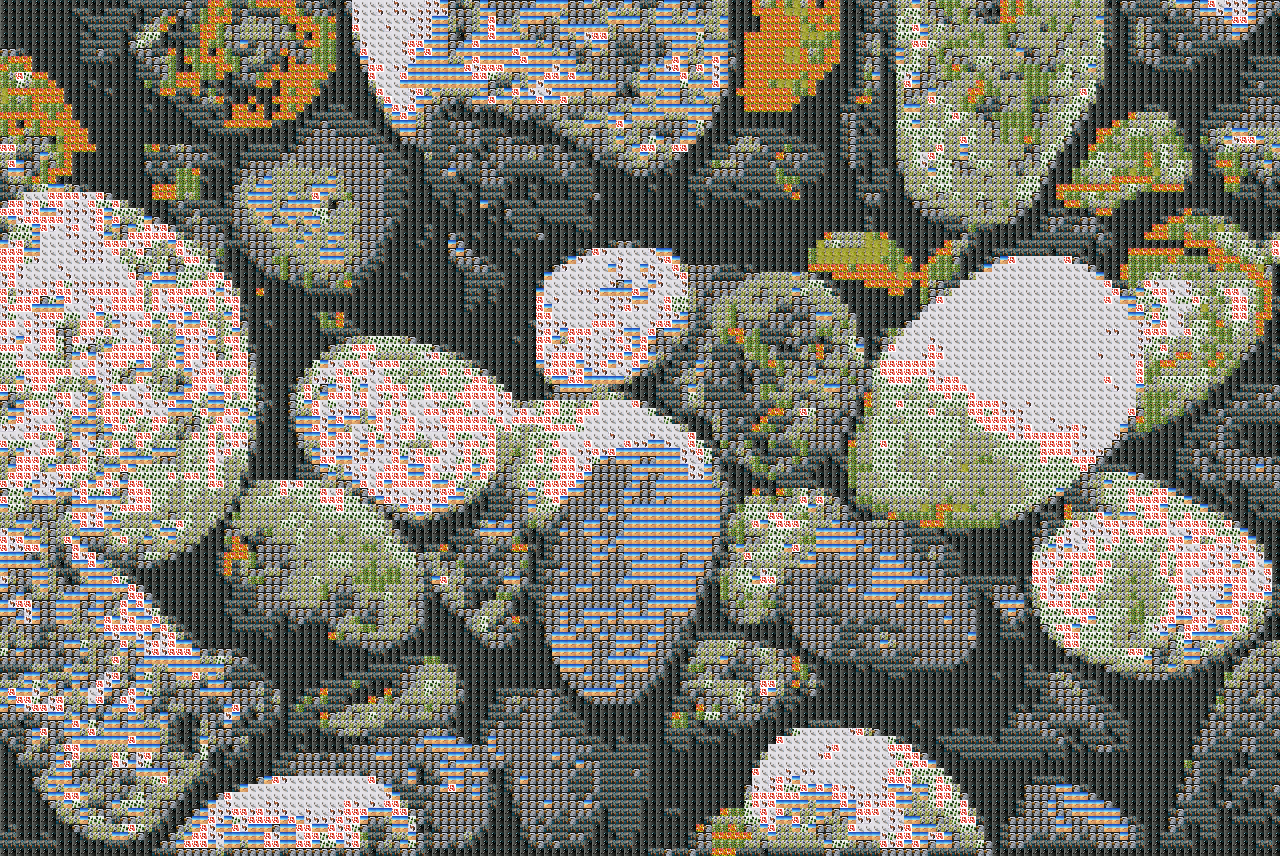

In [2]:
import numpy as np
import sys, cv2, math, glob
from google.colab.patches import cv2_imshow

d = 8 #@param {type:'integer'}

if d < 1:
  sys.exit('dの値は自然数にしてください')

file_path = '/content/sample_file__path.jpg' #@param {type:'string'}

original_img = cv2.imread(file_path)

if original_img is None:
  sys.exit('エラー: モザイクアートにする画像ファイルを開けませんでした')

h = original_img.shape[0]
w = original_img.shape[1]

dh = math.ceil(h / d)
dw = math.ceil(w / d)

color = []
for x in range(dh):
  empty = []
  color.append(empty)


for i in range(dh):
  for j in range(dw):
    avg_r = 0
    avg_g = 0
    avg_b = 0
    for iy in range(d*i, d*(i+1)):
      if iy >= h:
        break
      for ix in range(d*j, d*(j+1)):
        if ix >= w:
          break
        avg_b += original_img[iy,ix][0]
        avg_g += original_img[iy,ix][1]
        avg_r += original_img[iy,ix][2]
    avg_b /= d**2
    avg_g /= d**2
    avg_r /= d**2
    color[i].append([avg_b, avg_g, avg_r])

folder_path = '/content/sample_folder_path' #@param {type:'string'}
file_list = glob.glob(folder_path + '/*')
img_list = []
color2 = []


for f in file_list:
  imgs = cv2.imread(f)

  if imgs is None:
    sys.exit('エラー: モザイクアートの素材となる画像ファイルを開けませんでした')

  h2 = imgs.shape[0]
  w2 = imgs.shape[1]

  if h2 > w2:
    imgs = imgs[(h2-w2)//2 : w2 , 0 : w2]
  elif h2 < w2:
    imgs = imgs[0 : h2 , (w2-h2)//2: w2]

  imgs = cv2.resize(imgs, (d,d))

  img_list.append(imgs)

  avg_r = 0
  avg_g = 0
  avg_b = 0

  for iy in range(d):
    for ix in range(d):
      avg_b += imgs[iy,ix][0]
      avg_g += imgs[iy,ix][1]
      avg_r += imgs[iy,ix][2]
  avg_b /= d**2
  avg_g /= d**2
  avg_r /= d**2
  color2.append([avg_b, avg_g, avg_r])

img2 = np.zeros((d*dh,d*dw, 3), np.uint8)

for i in range(dh):
  for j in range(dw):
    shikisa_list = []
    for c in color2:
      shikisa = (color[i][j][0] - c[0])**2 + (color[i][j][1] - c[1])**2 + (color[i][j][2] - c[2])
      shikisa_list.append(shikisa)

    x = shikisa_list.index(min(shikisa_list))
    img2[d*i : d*i+d, d*j: d*j+d] = img_list[x]

cv2_imshow(img2)